In [1]:
from models import *
from static import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

### Simulate One Model

In [2]:
steps = 50
model = abmodel(static_map_v0(), all_agents())
model.run_model(steps)
model_results = model.datacollector.get_model_vars_dataframe()
model_results.head()

/Users/chen-lichiang/Desktop/KCL Term 2/ABM_FX/corporates.py:60: RuntimeWarning: invalid value encountered in power
  return (currencyA**(self.cost_currencyA/cost_total)) * (currencyB**(self.cost_currencyB/cost_total))
/Users/chen-lichiang/Desktop/KCL Term 2/ABM_FX/corporates.py:153: RuntimeWarning: divide by zero encountered in scalar power
  target_currencyA = ((self.cost_currencyB/self.cost_currencyA)*(target_utility**(-cost_total/self.cost_currencyB)))**(-1/(1+(self.cost_currencyA/self.cost_currencyB)))
/Users/chen-lichiang/Desktop/KCL Term 2/ABM_FX/corporates.py:154: RuntimeWarning: invalid value encountered in scalar divide
  target_currencyB = (target_utility/(target_currencyA**(self.cost_currencyA/cost_total)))**(cost_total/self.cost_currencyB)
/Users/chen-lichiang/Desktop/KCL Term 2/ABM_FX/corporates.py:60: RuntimeWarning: invalid value encountered in scalar power
  return (currencyA**(self.cost_currencyA/cost_total)) * (currencyB**(self.cost_currencyB/cost_total))


,Step,(Corporate V0),Trade Volume (Corporate V0),Price (Corporate V0),(Central Bank V0),interest_rate,inflation_rate,growth_rate,target_interest_rate,target_inflation_rate,(Local Bank),Trade Volume (Local Bank),Price (Local Bank),Hedge Volume (Local Bank),Hedge Price (Local Bank),(International Bank),Trade Volume (International Bank),Price (International Bank),Hedge Volume (International Bank),Hedge Price (International Bank)
0,1,300,42,1.032345,2,"(0.0025, 0.01)","(0.012907044336120997, 0.03482117776771093)","(0.046267126635885995, 0.054275291589008984)","(0.004710341720326781, 0.03885357410577391)","(0.02, 0.02)",8,42,1.032345,340,1.065992,8,42,1.032345,340,1.065992
1,2,300,5,1.148058,2,"(0.0025, 0.01)","(0.041780855958375704, 0.03466289628032658)","(0.03851357241785519, 0.03198787253889603)","(0.03249412982212449, 0.0693694124460709)","(0.02, 0.02)",8,5,1.148058,11,1.260360,8,5,1.148058,11,1.260360
2,3,300,2,1.862866,2,"(0.01, 0.01)","(0.03980334938142535, 0.04297852277517102)","(0.0644771500297443, 0.04619224413861736)","(0.07192807014649115, 0.05798828068993789)","(0.02, 0.02)",8,2,1.862866,12,1.620053,8,2,1.862866,12,1.620053
3,4,300,6,1.482290,2,"(0.0175, 0.0175)","(0.022085037321429375, 0.04293747269836344)","(0.04917258465707305, 0.04780276253102614)","(0.08194359908701018, 0.0775639062320652)","(0.02, 0.02)",8,6,1.482290,16,1.396263,8,6,1.482290,16,1.396263
4,5,300,2,0.670363,2,"(0.0175, 0.024999999999999998)","(0.043364193519623284, 0.023806817432549147)","(0.05750001751309086, 0.052912457153239875)","(0.04771384831068058, 0.07830759031305823)","(0.02, 0.02)",8,2,0.670363,2,1.491744,8,2,0.670363,2,1.491744


### Corporate Details

In [3]:
model.corporate_details.by_agent(model.corporate_details.all_ids()[0]).head()

,Step,Position,Currency A,Currency B,Quotes,Traded Price,Traded Amount,Traded with
0,0,"(39, 32)",37,46,"(None, None, None)",[],[],[]
1,1,"(38, 32)",35,48,"(long, 0.9764, 12.598254584616896)",[],[],[]
2,2,"(38, 33)",33,50,"(long, 1.0749, 13.836747125710843)",[],[],[]
3,3,"(37, 33)",31,52,"(long, 1.1719, 14.959062224409344)",[],[],[]
4,4,"(36, 33)",29,54,"(long, 1.2704, 15.961929384712505)",[],[],[]


### Bank Details

In [4]:
model.bank_details.all_ids()

[5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309]

In [5]:
model.bank_details.by_agent(model.bank_details.all_ids()[0]).head()

,Step,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Hedged Price,Hedged Amount,Hedged with
0,0,"(10, 10)",410.000000,248.000000,[],[],[],[],[],[]
1,1,"(10, 10)",417.676769,271.245999,"[1.1368, 1.4124]","[-10.71994719544037, -14.893230830404569]","[5116, 5184]","[0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.7...","[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.41, 1.41, 1.4...","[5303, 5303, 5303, 5303, 5303, 5303, 5303, 530..."
2,2,"(10, 10)",410.676769,267.245999,[],[],[],[],[],[]
3,3,"(10, 10)",403.676769,263.245999,[],[],[],[],[],[]
4,4,"(10, 10)",396.676769,259.245999,[],[],[],[],[],[]


In [6]:
model.bank_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Hedged Price,Hedged Amount,Hedged with
0,5302,"(10, 10)",226.927744,62.180532,[],[],[],[],[],[]
1,5303,"(20, 10)",282.347898,131.218170,[],[],[],[0.46],[2.16],[5305]
2,5304,"(30, 10)",252.399256,227.678559,[],[],[],[],[],[]
3,5305,"(40, 10)",878.291991,406.390098,[0.384],[60.57965679376566],[5034],"[0.48, 0.48, 0.47, 0.47, 0.47, 0.47]","[-2.09, -2.1, -2.11, -2.12, -2.13, -2.14]","[5303, 5303, 5303, 5303, 5303, 5303]"
4,5306,"(10, 40)",66.057476,131.619253,[],[],[],[],[],[]
5,5307,"(20, 40)",115.013120,439.409237,[],[],[],[],[],[]
6,5308,"(30, 40)",81.236619,307.708569,[],[],[],[3.69],[1],[5307]
7,5309,"(40, 40)",184.246734,670.768029,[],[],[],[],[],[]


In [7]:
model.international_bank_details.all_ids()

[5310, 5311]

In [8]:
model.international_bank_details.by_step(steps)

,Agent ID,Position,Currency A,Currency B,Traded Price,Traded Amount,Traded with,Hedged Price,Hedged Amount,Hedged with
0,5310,"(25, 15)",2208.483244,333.335835,[],[],[],"[0.46, 0.46]","[2.18, 2.17]","[5303, 5303]"
1,5311,"(25, 35)",1096.259790,2000.113020,[],[],[],[],[],[]


### Interbank Limit Order Book

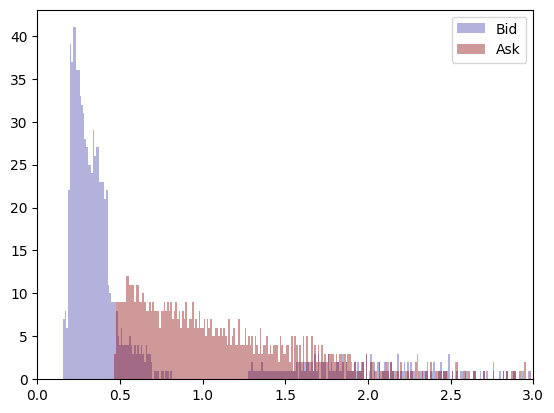

In [9]:
model.bank_details.lob(steps)

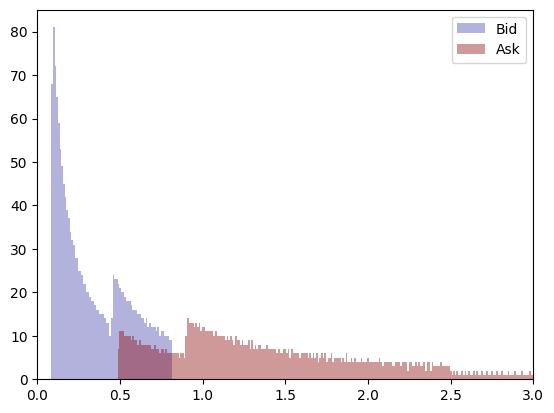

In [10]:
model.international_bank_details.lob(steps)

### Central Bank Detail

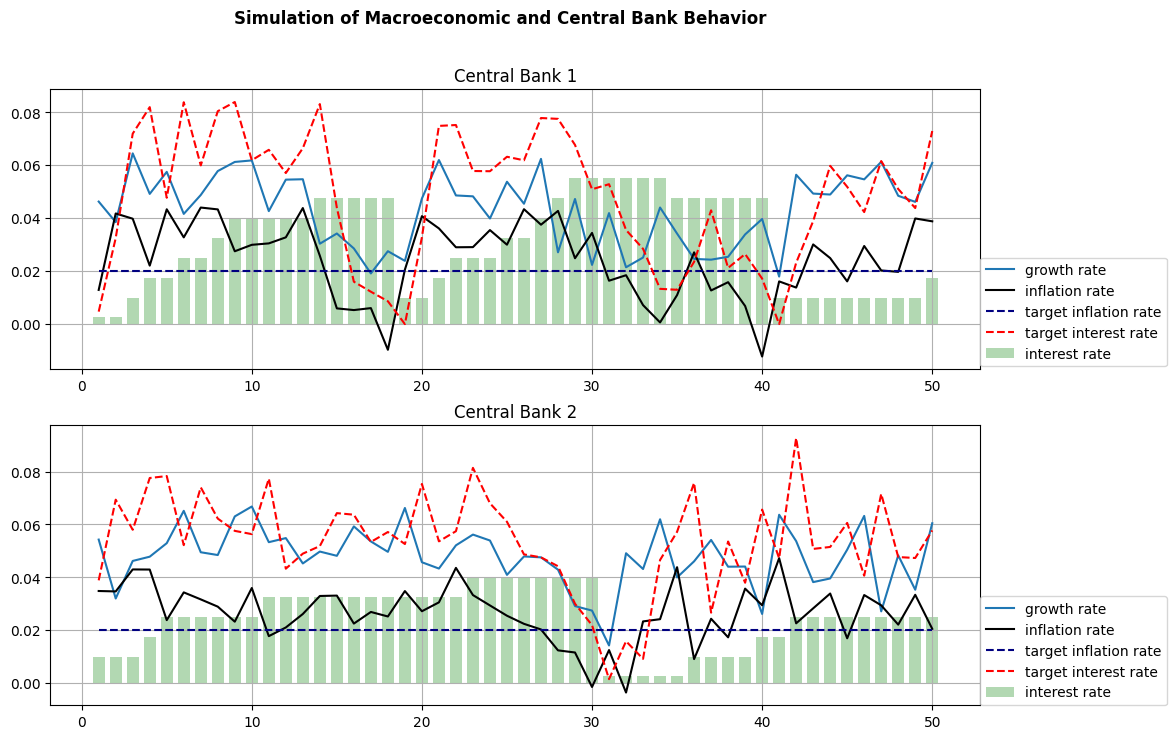

In [11]:
steps = model_results['Step'].values
interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)
inflation_rate_1_data, inflation_rate_2_data = zip(*model_results['inflation_rate'].values)

growth_rate_1_data, growth_rate_2_data = zip(*model_results['growth_rate'].values)
target_interest_rate_1_data, target_interest_rate_2_data = zip(*model_results['target_interest_rate'].values)
target_inflation_rate_1_data, target_inflation_rate_2_data = zip(*model_results['target_inflation_rate'].values)


fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (12, 8))
fig.suptitle('Simulation of Macroeconomic and Central Bank Behavior', fontweight = 'bold', fontsize = 12) # set title
ax1.set_title("Central Bank 1")
ax1.plot(steps, growth_rate_1_data, label = 'growth rate')
ax1.plot(steps, inflation_rate_1_data, label = 'inflation rate', color = 'black')
ax1.bar(steps, interest_rate_1_data, color = 'green', alpha = 0.3, width = 0.7, label = 'interest rate')
ax1.plot(steps, target_inflation_rate_1_data, label = 'target inflation rate', color = 'navy', linestyle = '--')
ax1.plot(steps, target_interest_rate_1_data, label = 'target interest rate', color = 'red', linestyle = '--')
ax1.legend(loc = [1, 0.01])

ax2.set_title("Central Bank 2")
ax2.plot(steps, growth_rate_2_data, label = 'growth rate')
ax2.plot(steps, inflation_rate_2_data, label = 'inflation rate', color = 'black')
ax2.bar(steps, interest_rate_2_data, color = 'green', alpha = 0.3, width = 0.7, label = 'interest rate')
ax2.plot(steps, target_inflation_rate_2_data, label = 'target inflation rate', color = 'navy', linestyle = '--')
ax2.plot(steps, target_interest_rate_2_data, label = 'target interest rate', color = 'red', linestyle = '--')
ax2.legend(loc = [1, 0])
ax1.grid()
ax2.grid()
plt.show()

### Positions of Agents

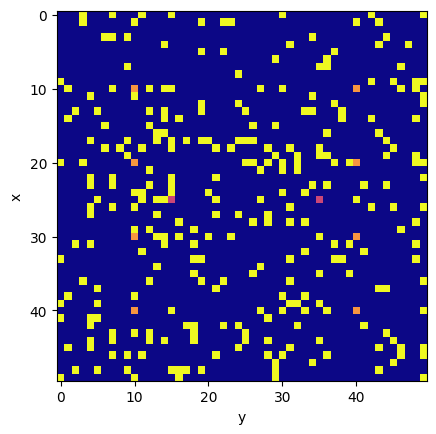

In [12]:
step = 0
final_pos_corps = model.corporate_details.agent_pos[step]
final_pos_banks = model.bank_details.agent_pos[step]
final_pos_int_banks = model.international_bank_details.agent_pos[step]
final_grid = [[0]*50 for i in range(50)]
for pos in final_pos_corps:
    (x,y) = pos
    final_grid[x][y] = 1
for pos in final_pos_banks:
    (x,y) = pos
    final_grid[x][y] = 0.75
for pos in final_pos_int_banks:
    (x,y) = pos
    final_grid[x][y] = 0.5
plt.imshow(final_grid, cmap='plasma')
plt.ylabel('x')
plt.xlabel('y')
plt.show()

### 3D Map of Resources

In [13]:
currencyA_3d = np.array([[a.pos[0], a.pos[1], a.amount] for a in model.schedule.agents_by_type[currencyA_basic].values()])
currencyB_3d = np.array([[a.pos[0], a.pos[1], a.amount] for a in model.schedule.agents_by_type[currencyB_basic].values()])

In [14]:
%matplotlib inline
import plotly.graph_objects as go
from scipy.interpolate import griddata
x = currencyA_3d[:,0]
y = currencyA_3d[:,1]
z = currencyA_3d[:,2]
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

X,Y = np.meshgrid(xi,yi)

Z = griddata((x,y),z,(X,Y), method='cubic')

fig = go.Figure(go.Surface(x=xi,y=yi,z=Z))

fig.update_layout(title='Currency A Distribution', autosize=False,
                  width=500, height=550,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()

In [15]:
x = currencyB_3d[:,0]
y = currencyB_3d[:,1]
z = currencyB_3d[:,2]
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

X,Y = np.meshgrid(xi,yi)

Z = griddata((x,y),z,(X,Y), method='cubic')

fig = go.Figure(go.Surface(x=xi,y=yi,z=Z))

fig.update_layout(title='Currency B Distribution', autosize=False,
                  width=500, height=550,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()